In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:

df = data('swiss')

In [3]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [7]:
df.shape

(47, 6)

In [8]:
target = 'Education'

In [11]:
from sklearn.model_selection import train_test_split

In [9]:
def train_validate_test_split(df, target):
   
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [12]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test_split(df, target)

In [13]:
X_train.head(20)

,Fertility,Agriculture,Examination,Catholic,Infant.Mortality
Rolle,60.5,60.8,16,7.72,16.3
Lavaux,65.1,73.0,19,2.84,20.0
Nyone,56.6,50.9,22,15.14,16.7
Conthey,75.5,85.9,3,99.71,15.1
Yverdon,65.4,49.5,15,6.10,22.5
Oron,72.5,71.2,12,2.40,21.0
Cossonay,61.7,69.3,22,2.82,18.7
St Maurice,65.0,75.9,9,99.06,17.8
Franches-Mnt,92.5,39.7,5,93.40,20.2
Orbe,57.4,54.1,20,4.20,15.3


## OLS Model

In [14]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict Education_pred_mean
Education_pred_mean = y_train['Education'].mean()
y_train['Education_pred_mean'] = Education_pred_mean
y_validate['Education_pred_mean'] = Education_pred_mean

# 2. compute Education_pred_median
Education_pred_median = y_train['Education'].median()
y_train['Education_pred_median'] = Education_pred_median
y_validate['Education_pred_median'] = Education_pred_median

# 3. RMSE of Education_pred_mean
rmse_train = mean_squared_error(y_train.Education, y_train.Education_pred_mean)**1/2
rmse_validate = mean_squared_error(y_validate.Education, y_validate.Education_pred_mean)**1/2

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of Education_pred_median
rmse_train = mean_squared_error(y_train.Education, y_train.Education_pred_median)**1/2
rmse_validate = mean_squared_error(y_validate.Education, y_validate.Education_pred_median)**1/2

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  20.5 
Validate/Out-of-Sample:  53.64
RMSE using Median
Train/In-Sample:  21.32 
Validate/Out-of-Sample:  58.58


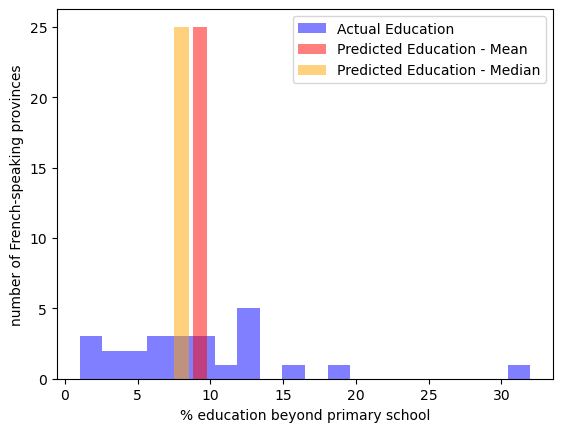

In [15]:
plt.hist(y_train.Education, color='blue', alpha=.5, label="Actual Education", bins = 20)
plt.hist(y_train.Education_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Education - Mean")
plt.hist(y_train.Education_pred_median, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Education - Median")
plt.xlabel("% education beyond primary school")
plt.ylabel("number of French-speaking provinces")
plt.legend()
plt.show()

In [16]:
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.Education)

# predict train
y_train['Education_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Education, y_train.Education_pred_lm)**1/2

# predict validate
y_validate['Education_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Education, y_validate.Education_pred_lm)**1/2

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  6.475458187520775 
Validation/Out-of-Sample:  23.784802831710376


## LassoLars

In [18]:
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.Education)

# predict train
y_train['Education_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Education, y_train.Education_pred_lars)**1/2

# predict validate
y_validate['Education_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Education, y_validate.Education_pred_lars)**1/2

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  20.500799999999998 
Validation/Out-of-Sample:  53.64253333333332


## TweedieRegressor (GLM)

In [19]:
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.Education)

# predict train
y_train['Education_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Education, y_train.Education_pred_glm)**1/2

# predict validate
y_validate['Education_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Education, y_validate.Education_pred_glm)**1/2

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  5.795364632256525 
Validation/Out-of-Sample:  27.362263848901716


## Polynomial Regression

In [20]:
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

## LinearRegression

In [21]:
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.Education)

# predict train
y_train['Education_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Education, y_train.Education_pred_lm2)**1/2

# predict validate
y_validate['Education_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Education, y_validate.Education_pred_lm2)**1/2

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.3529139611801827 
Validation/Out-of-Sample:  82.26378895254514


## Evaluate

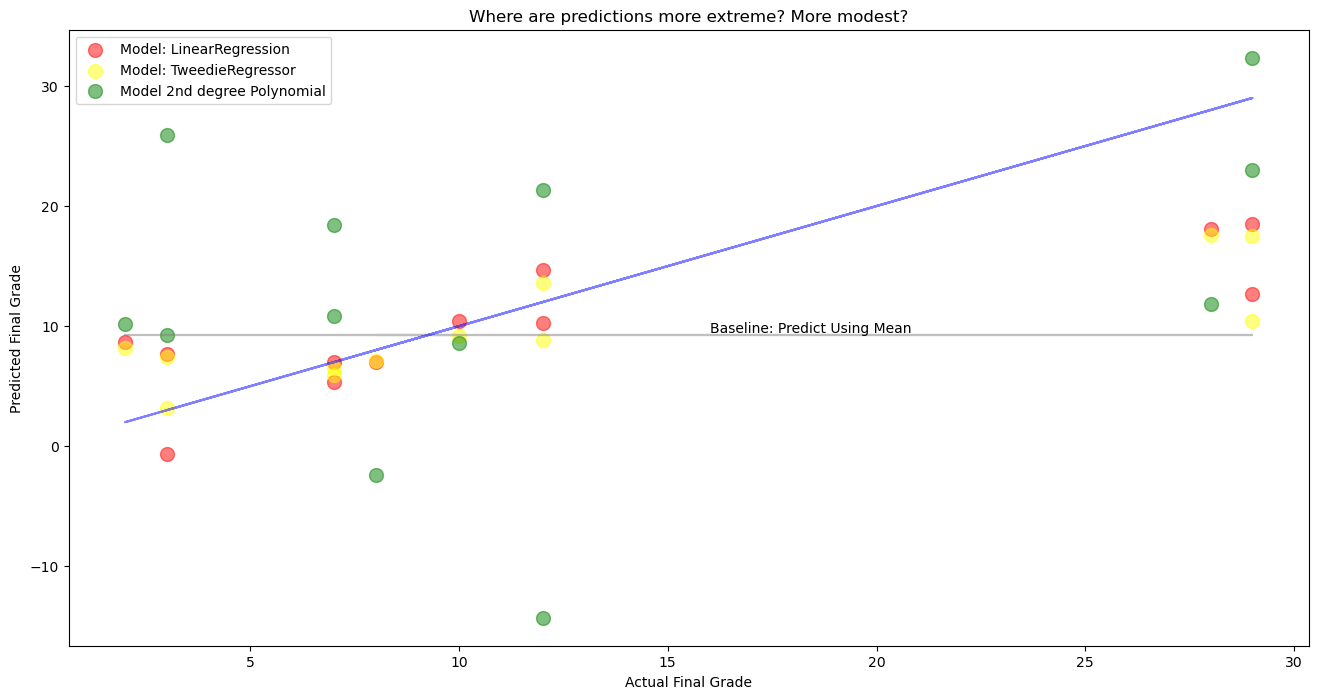

In [22]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.Education, y_validate.Education_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.Education, y_validate.Education, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.Education, y_validate.Education_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Education, y_validate.Education_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Education, y_validate.Education_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

In [ ]:
## Residual Plot

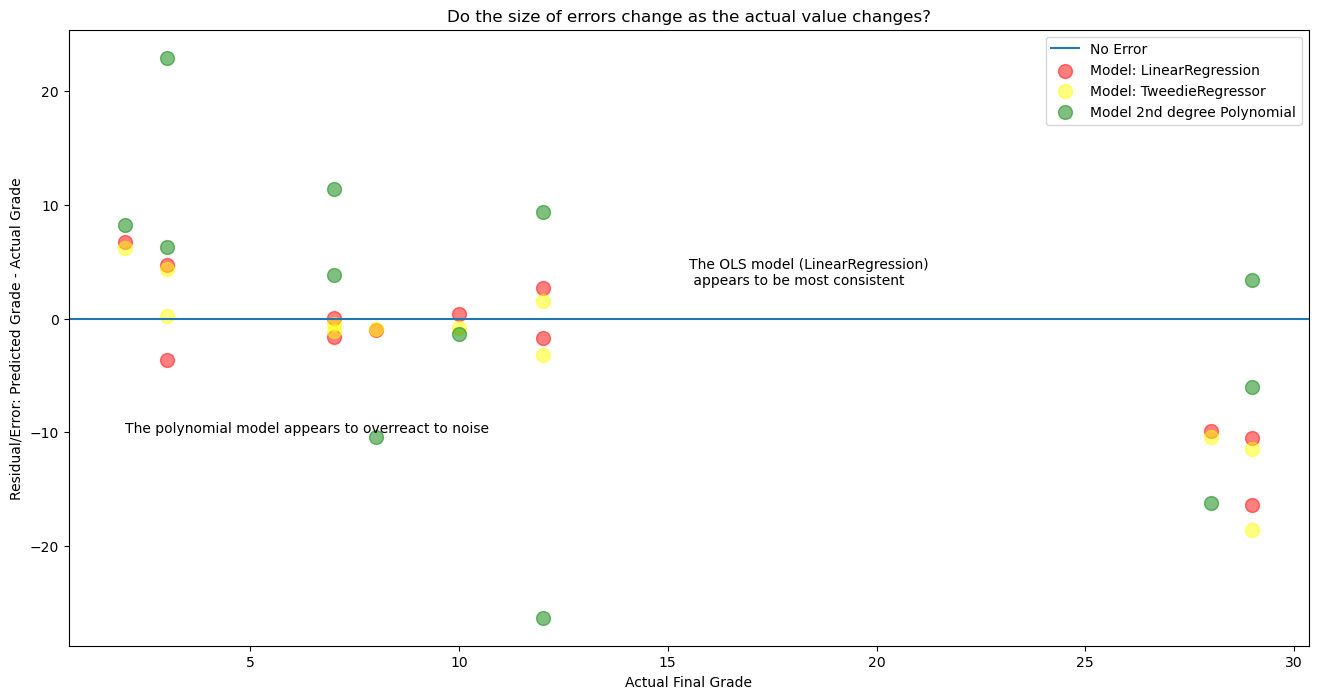

In [23]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.Education, y_validate.Education_pred_lm-y_validate.Education, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Education, y_validate.Education_pred_glm-y_validate.Education, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Education, y_validate.Education_pred_lm2-y_validate.Education, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Residual/Error: Predicted Grade - Actual Grade")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

## Notes
1.

 Regularization = "Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting." Towards Data Science

2.

 TweedieRegressor: Requires sklearn v0.23 or greater installed. To update, run in terminal: conda install scikit-learn=0.23